# Loading file and assign values

In [118]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import plotting_functions as plot
import fourierseries as fourier

data_file = "data_file_04-11-19_18-25-20"

path = "/Users/elenakern/university/masters/sai-2/apps/inertial_parameter_application/data_collection/simulation/inertial_params_est/"

path_data_file = path + data_file

file = np.loadtxt(path_data_file,skiprows=1)
#param axis: for how many axis is the joint trajectory designed
axis = 4


accel             = file[0::,0:3]    
avel             = file[0::,3:6]     
aaccel           = file[0::,6:9]     
gravity             = file[0::,9:12]   
force_virtual   = file[0::,12:15]   #virtual force simulation
torque_virtual  = file[0::,15:18]   #virtual torque simulation
phi_RLS         = file[0::,18:28]   #inertial parameters RLS
q   = file[0::,28:35]   #virtual force simulation
dq  = file[0::,35:42]   #virtual torque simulation
ddq = file [0::,42:49]
q_des = file [0::,49:49+axis]
dq_des = file [0::,49+axis:49+2*axis]
ddq_des = file[0::,49+2*axis:49+3*axis]

q_axis = q[:,7-axis::]
dq_axis = dq[:,7-axis::]
ddq_axis = ddq[:,7-axis::]

time = np.arange(np.size(accel[:,0]))
time = time/1000


array([0.0000e+00, 1.0000e-03, 2.0000e-03, ..., 2.7345e+01, 2.7346e+01,
       2.7347e+01])

# Fourier series in Python

In [119]:
a = np.array([-0.590865, 	0.274173, 	-0.242807, 	-0.530158, 	-0.549219, 	0.537474, 	0.0907198, 	-0.234161, 	-0.374772, 	0.0721155, 	0.191923, 	-0.00187571])
#b = np.array([ 0.164893, 	0.286424, 	-0.270565, 	0.686873, 	-0.102795, 	0.343893, 	0.0232298, 	-0.136117, 	-0.589154, 	0.182915, 	0.389056, 	0.473262])
b = np.zeros(a.shape)

N = 3 
T_s = 1/1000.0
w_f = 0.6
initial_config = np.array([0,  -45, 0, -115, 0, 60, 60.0])
q0 = initial_config[7-axis::]
q0 *= np.pi/180.0

q_fourier = np.array([fourier.fourier_series_q(a,b,axis,N, w_f, q0, t) for t in time])
dq_fourier = np.array([fourier.fourier_series_dq(a,b,axis,N, w_f, q0, t) for t in time])
ddq_fourier = np.array([fourier.fourier_series_ddq(a,b,axis,N, w_f, q0, t) for t in time])

# Plotting Functions
## TUM Colors

In [120]:
blue = (0,0.3961,0.7412)
red = (0.7686,0.0275,0.1059)
green =(0,0.4863,0.1882)
orange =  (0.8902, 0.4471, 0.1333)
purple = (0.4118, 0.0314, 0.3529)
grey = (0.6118, 0.6157, 0.6235)
yellow = (0.9765, 0.7294, 0)
color_list = [blue, red, green, orange, grey, purple, yellow]

In [121]:
def joint_angles_compare(time, axis, angles, angles_des, derivative):
    plt.figure(figsize=(9,7))
    if derivative == 0:
        joint_lables=['$q_1$','$q_2$','$q_3$','$q_4$','$q_5$','$q_6$', '$q_7$']
        joint_lables_des=[r'$q_{1_{\mathrm{des}}}$','$q_{2_{\mathrm{des}}}$','$q_{3_{\mathrm{des}}}$','$q_{4_{\mathrm{des}}}$','$q_{5_{\mathrm{des}}}$','$q_{6_{\mathrm{des}}}$', r'$q_{7_{\mathrm{des}}}$']
        y_label = "Joint angles $q$ in $rad$"
    if derivative == 1:
        joint_lables=['$\dot{q}_1$','$\dot{q}_2$','$\dot{q}_3$','$\dot{q}_4$','$\dot{q}_5$','$\dot{q}_6$', '$\dot{q}_7$']
        joint_lables_des=['$\dot{q}_{1_{\mathrm{des}}}$','$\dot{q}_{2_{\mathrm{des}}}$','$\dot{q}_{3_{\mathrm{des}}}$','$\dot{q}_{4_{\mathrm{des}}}$','$\dot{q}_{5_{\mathrm{des}}}$','$\dot{q}_{6_{\mathrm{des}}}$', '$\dot{q}_{7_{\mathrm{des}}}$']
        y_label = r"Joint velocities $\dot{q}$ in $\frac{rad}{s}$"
    if derivative == 2:
        joint_lables=['$\ddot{q}_1$','$\ddot{q}_2$','$\ddot{q}_3$','$\ddot{q}_4$','$\ddot{q}_5$','$\ddot{q}_6$', '$\ddot{q}_7$']
        joint_lables_des=['$\ddot{q}_{1_{\mathrm{des}}}$','$\ddot{q}_{2_{\mathrm{des}}}$','$\ddot{q}_{3_{\mathrm{des}}}$','$\ddot{q}_{4_{\mathrm{des}}}$','$\ddot{q}_{5_{\mathrm{des}}}$','$\ddot{q}_{6_{\mathrm{des}}}$', '$\ddot{q}_{7_{\mathrm{des}}}$']
        y_label = r"Joint accelerations $\ddot{q}$ in $\frac{rad}{s^2}$"    
    joint_lables = joint_lables[7-axis::]
    joint_lables_des = joint_lables_des[7-axis::]
    for i, lable_q, in enumerate(joint_lables):
        plt.plot(time, angles[:, i], c = color_list[i], label = lable_q, linewidth=2.0 )
        plt.plot(time, angles_des[:, i], c=color_list[i], label = joint_lables_des[i] , linewidth=2.0, linestyle = '--')
        plt.xlabel("Time $t$ in $s$")
        plt.ylabel(y_label)
        plt.xlim(0, time[-1])
        plt.grid(True)
        plt.legend()
def xyz(time, data, variable_name, variable_abbreviation, variable_unit):
    plt.figure(figsize=(9,7))
    coordinates = ["$_x$","$_y$","$_z$"]
    for idx, coordinate in enumerate(coordinates):
        plt.plot(time, data[:,idx], c = color_list[idx], label = variable_abbreviation + str(coordinate),  linewidth=2.0)
        plt.xlabel("Time $t$ in $s$")
        plt.ylabel(variable_name + " " + variable_abbreviation + " in " + variable_unit)
        plt.xlim(0, time[-1])
        plt.grid(True)
        plt.legend()
        
def force_torque(time, data_1, data_2):
    f, axarr = plt.subplots(3,2,figsize=(15,9))
    coordinates = ["$_x$","$_y$","$_z$"]
    for idx,coordinate in enumerate(coordinates):
        axarr[idx,0].plot(time, data_1[:,idx], c=color_list[idx], linewidth=2.0)
        axarr[idx,0].set_xlim([0, time[-1]])
        axarr[idx,0].set_ylabel("$F$"+str(coordinate)+" in " "$N$")
        axarr[idx,0].grid(True)
    for idx,coordinate in enumerate(coordinates):
        axarr[idx,1].plot(time, data_2[:,idx], c=color_list[idx], linewidth=2.0)
        axarr[idx,1].set_xlim([0, time[-1]])
        axarr[idx,1].set_ylabel(r"$\tau$"+str(coordinate)+" in " "$Nm$")
        axarr[idx,1].grid(True)
    axarr[2,0].set_xlabel("Time $t$ in $s$")
    axarr[2,1].set_xlabel("Time $t$ in $s$")
    plt.setp([a.get_xticklabels() for a in axarr[0, :]], visible=False)
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)

## Compare desired trajectory, actual trajectory

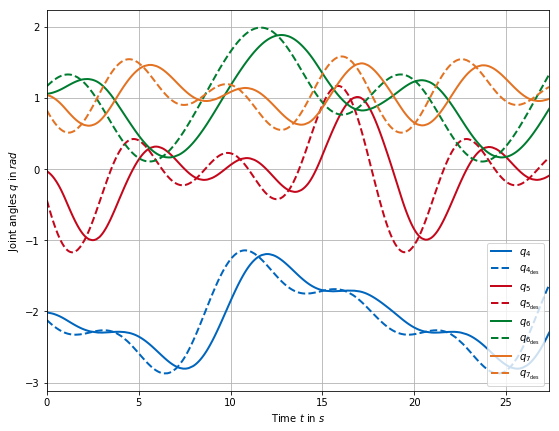

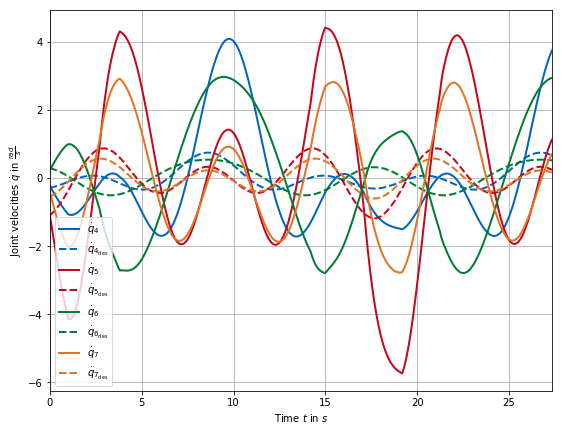

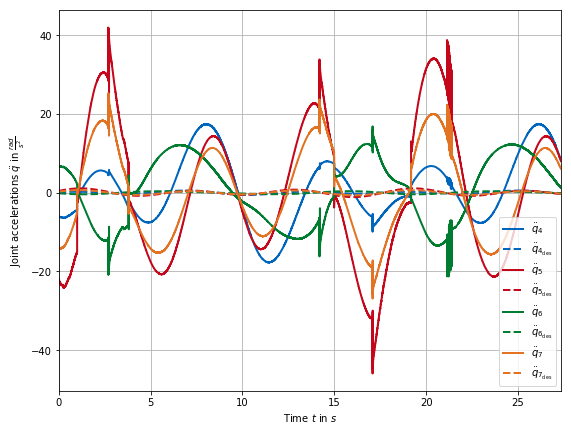

In [122]:
joint_angles_compare(time, axis, q_axis, q_des, 0)
joint_angles_compare(time, axis, dq_axis, dq_des, 1)
joint_angles_compare(time, axis, ddq_axis, ddq_des, 2)

## Compare trajectory computed during runtime, precomputed in Python

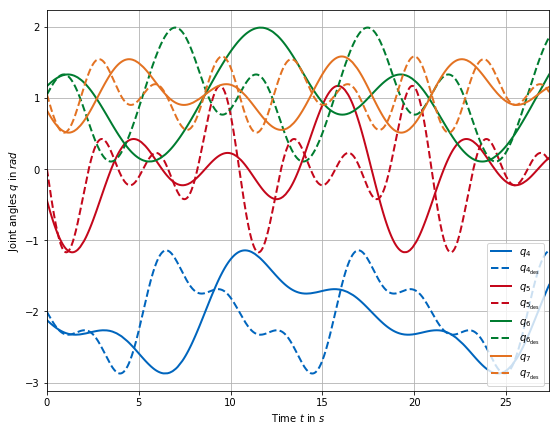

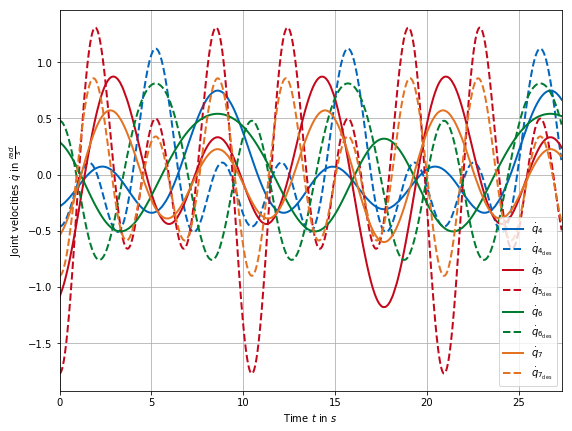

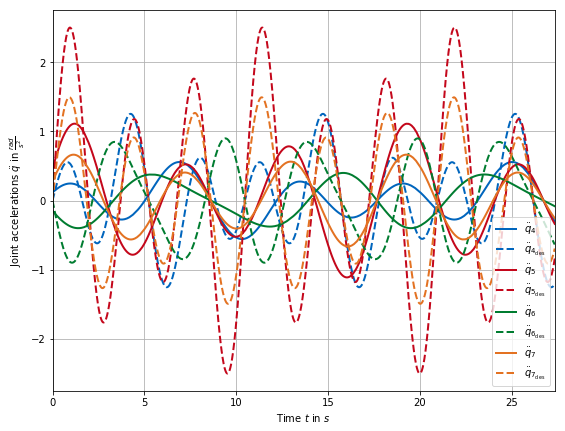

In [123]:
joint_angles_compare(time, axis, q_des, q_fourier, 0)
joint_angles_compare(time, axis, dq_des, dq_fourier, 1)
joint_angles_compare(time, axis, ddq_des, ddq_fourier, 2)


## Force and Torque

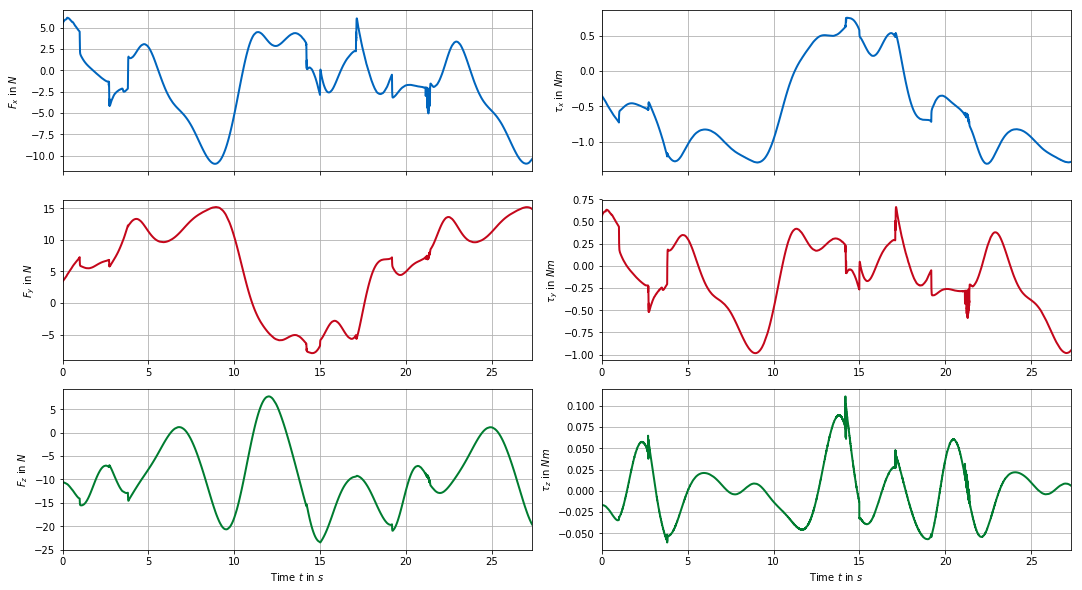

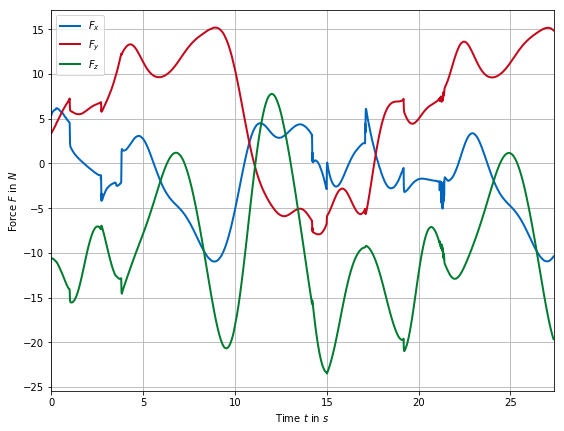

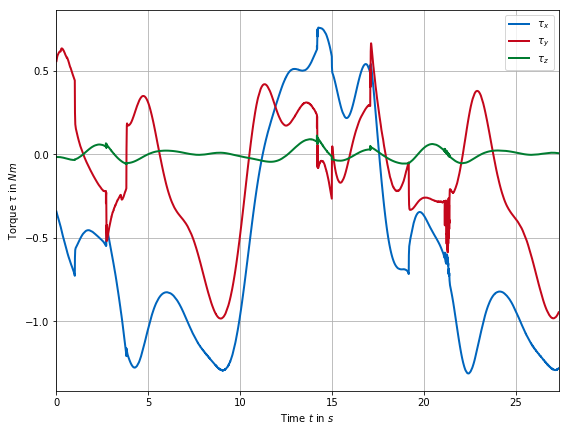

In [124]:
force_torque(time, force_virtual, torque_virtual)
xyz(time, force_virtual, "Force", r"$F$", r"$N$")
xyz(time, torque_virtual, "Torque", r"$\tau$", r"$Nm$")

## Kinematics

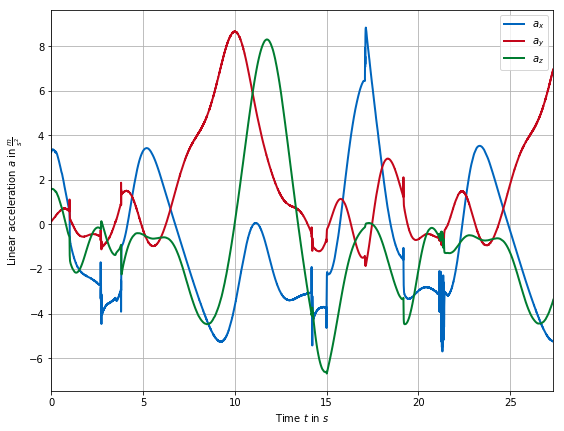

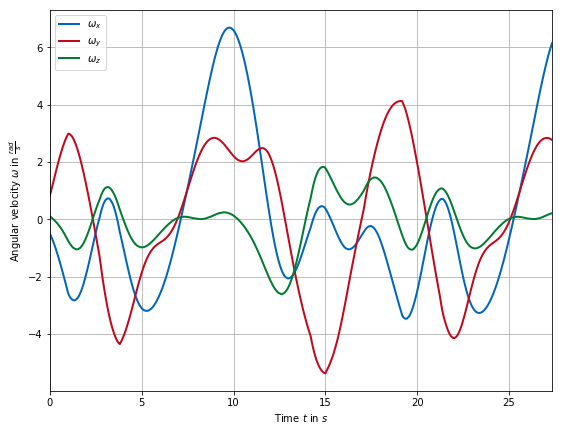

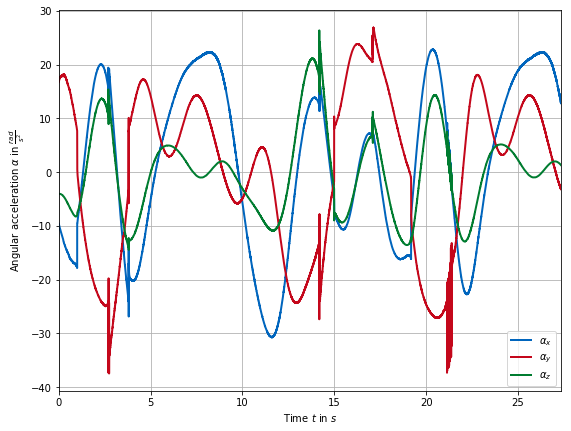

In [125]:
xyz(time, accel, "Linear acceleration", "$a$", r"$\frac{m}{s^2}$")
xyz(time, avel, "Angular velocity", r"$\omega$", r"$\frac{rad}{s}$")
xyz(time, aaccel, "Angular acceleration", r"$\alpha$", r"$\frac{rad}{s^2}$")

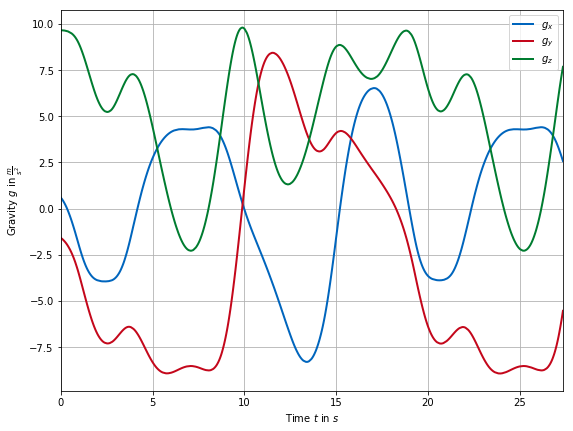

In [126]:
xyz (time, gravity, "Gravity" , "$g$", r"$\frac{m}{s^2}$" )